In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dataset

In [67]:
#dataset link: https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data
df = pd.read_csv('holidays_events.csv')
df.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [11]:
df.shape

(350, 6)

In [66]:
df.describe()

C:\Users\Zigron\AppData\Local\Temp\ipykernel_12196\3627053830.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe()


,date,type,locale,locale_name,description,transferred
count,350,350,350,350,350,350
unique,312,6,3,24,103,2
top,2014-06-25 00:00:00,Holiday,National,Ecuador,Carnaval,False
freq,4,221,174,174,10,338
first,2012-03-02 00:00:00,NaN,NaN,NaN,NaN,NaN
last,2017-12-26 00:00:00,NaN,NaN,NaN,NaN,NaN


# Labels and Title

In [47]:
def labelsAndTitle(xlabel, ylabel, title, lagendTitle):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    if(lagendTitle == 'No'):
        print('')
    else:
        plt.legend(title = lagendTitle)

# Line Plot

In [36]:
def LinePlot(df):
    # Convert the date column to datetime format
    df['date'] = pd.to_datetime(df['date'])

    # Group the data by type and date, and count the number of events in each group
    counts = df.groupby(['type', 'date']).size()

    # Reshape the counts into a wide format with one column for each type of event
    counts_wide = counts.unstack('type')

    # Plot the counts as separate lines on a single plot
    counts_wide.plot(kind='line')

    # Add labels and legend
    labelsAndTitle('Date','Number of Events', 'Holiday and Event Counts by Type','Event Type')
    

# Bar Graph

In [54]:
def barGraph(df):
    # Group the data by type and count the number of events in each group
    counts = df.groupby('type').size()

    # Plot the counts as a bar chart
    counts.plot(kind='bar')

    # Add labels and title
    labelsAndTitle('Event Type','Number of Events', 'Total Number of Events by Type', 'No')

# Multi Bar Graph

In [40]:
def multiBarGraph(df):
    # Group the data by type, locale, and count the number of events in each group
    counts = df.groupby(['type', 'locale']).size()

    # Reshape the counts into a wide format with one column for each locale
    counts_wide = counts.unstack('locale')

    # Plot the counts as a stacked bar chart
    counts_wide.plot(kind='bar', stacked=True)

    # Add labels and title
    labelsAndTitle('Event Type','Number of Events', 'Total Number of Events by Type and Locale','Locale')

# Heat Map

In [52]:
def heatMap(df):
    # Convert date column to datetime format
    df['date'] = pd.to_datetime(df['date'])

    # Group the data by month and year, and count the number of events in each group
    counts = df.groupby([df['date'].dt.year, df['date'].dt.month]).size()

    # Reshape the counts into a matrix with one row for each year and one column for each month
    counts_matrix = counts.unstack()

    # Create a heatmap of the counts
    plt.imshow(counts_matrix, cmap='Blues')

    # Add tick labels for months and years
    plt.xticks(np.arange(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.yticks(np.arange(counts_matrix.shape[0]), labels=counts_matrix.index)

    # Add a colorbar and title
    labelsAndTitle('Months','Years', 'Number of Events by Month and Year','No')

# Function Calling

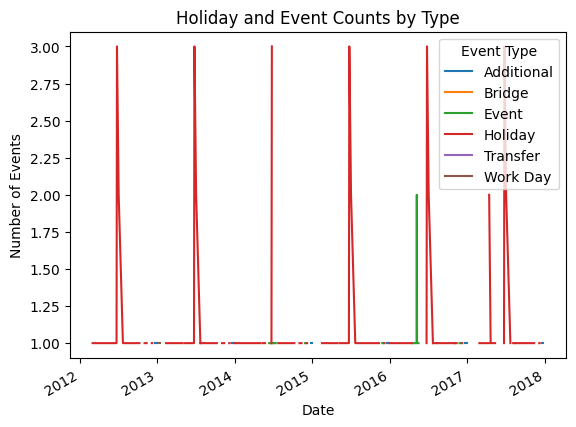

In [56]:
LinePlot(df)

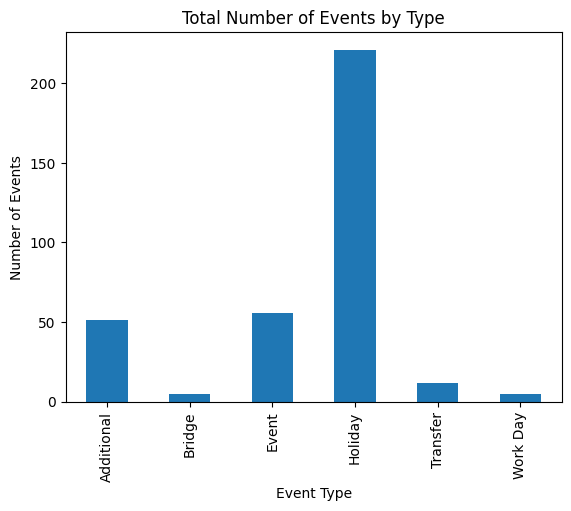

In [57]:
barGraph(df)

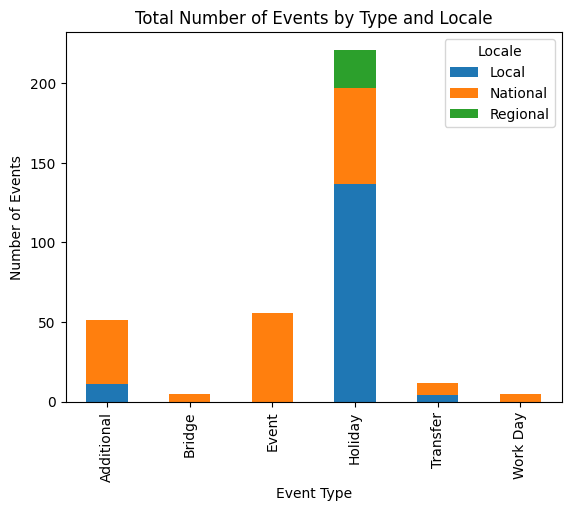

In [58]:
multiBarGraph(df)

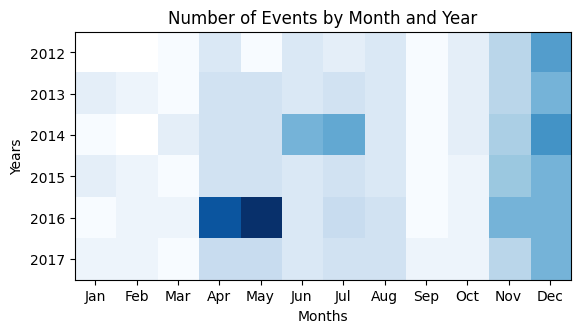

In [59]:
heatMap(df)